In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

from sklearn import metrics

# DBSCAN


W DBSCAN dla każdej punktu przypisywana jest etykieta:

 * Punkt jest uważany za punkt centralny (**core point**) jeśli przynajmniej **MinPts** sąsiednich punktów mieści się w otoczeniu o promieniu $\varepsilon$
 * Punkt jest uważany za punkt graniczny (**border point**) jeśli w jego otoczeniu o promieniu $\varepsilon$ mniej sąsiadów niż **MinPts** ale w jego otoczeniu znajduje się **core point**
 *  Wszystkie inne punkty są uznawane za szum (**noise points**)



Po oznaczeniu wszytkich punktów jako **core point**, **border point** lub **noise points** algorytm DBSCAN opiera się na:

 * Utwórz osobny klaster dla każdego punktu centralnego lub połączonej grupy punktów centralnych (punkty centralne są połączone jeśli nie są dalej niż $\varepsilon$).
 * Przypisz każdy punkt graniczny do klastra odpowiadającego najbliższemu punktowi centralnemu.


In [2]:
rnd.seed(123)
X = np.concatenate([rnd.multivariate_normal((0,0),np.array([[0.1,0],[0,10]]),30),
                    rnd.multivariate_normal((6,5),np.array([[10,0],[0,0.1]]),30),
                    rnd.multivariate_normal((8,-2),np.array([[1,0],[0,1]]),30)],axis=0)
y = np.repeat(range(3),30)

import seaborn as sns
colors = sns.color_palette("Set2", 20)

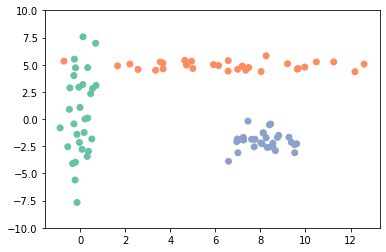

In [3]:
plt.scatter(X[:,0],X[:,1],c=np.array(colors)[y])
plt.ylim(-10,10)
plt.show()

[ 0  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


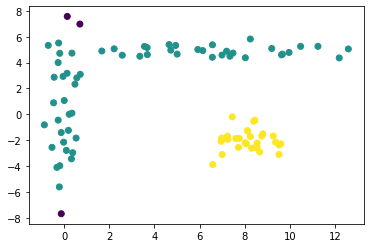

In [4]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps = 1.7, min_samples=3)
labels = model.fit_predict(X)

print(labels)

plt.scatter(X[:,0],X[:,1],c=labels+1)
plt.show()

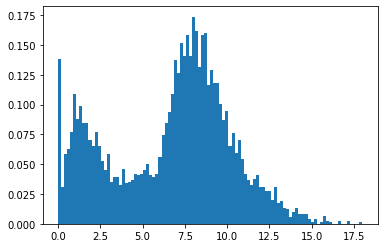

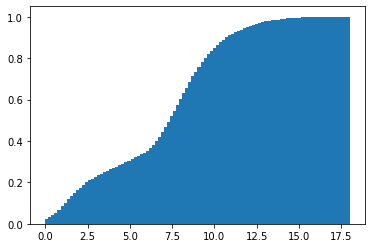

In [5]:
from sklearn.metrics.pairwise import euclidean_distances
x = euclidean_distances(X, X)

# wybieramy tylko część pod przekątną
xx = x[np.tril_indices(x.shape[0])]

plt.hist(xx,density=True, bins=100)#,cumulative=True
plt.show()
plt.hist(xx,density=True, bins=100, cumulative=True)
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


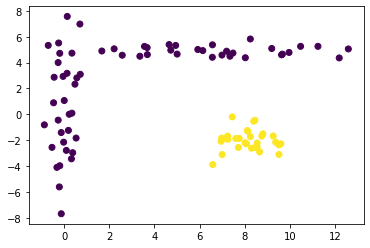

In [6]:
model = DBSCAN(eps = 2.5, min_samples=3)
labels = model.fit_predict(X)

print(labels)

plt.scatter(X[:,0],X[:,1],c=labels+1)
plt.scatter(X[labels==-1,0],X[labels==-1,1], c = 'r', marker = 'x')
plt.show()

4


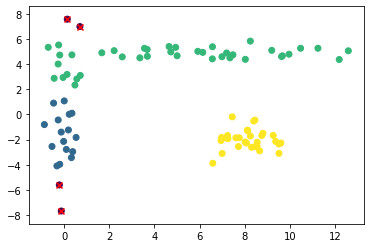

In [7]:
model = DBSCAN(eps = 1.34, min_samples=3)
labels = model.fit_predict(X)

print( len(np.unique(labels) ))

plt.scatter(X[:,0],X[:,1],c=labels+1)
plt.scatter(X[labels==-1,0],X[labels==-1,1], c = 'r', marker = 'x')
plt.show()

# Zad.

Zgadnij, która miara zadziała najlepiej

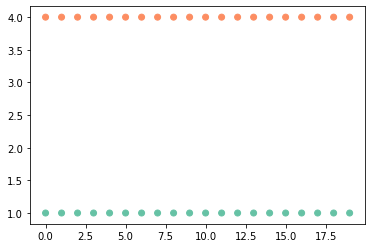

In [8]:
X= np.vstack([np.tile(range(20),2),np.repeat(np.array([1,4]),20)]).T
y = np.hstack((np.repeat(0,20),np.repeat(1,20)))
plt.scatter(X[:,0],X[:,1],c=np.array(colors)[y])
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


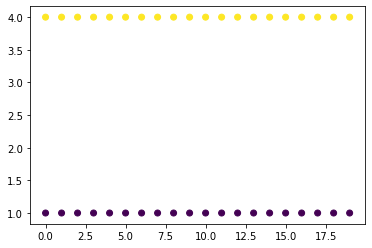

1.0


In [9]:
model = DBSCAN(eps = 2.5, min_samples=3)
labels = model.fit_predict(X)

print(labels)

plt.scatter(X[:,0],X[:,1],c=labels+1)
plt.scatter(X[labels==-1,0],X[labels==-1,1], c = 'r', marker = 'x')
plt.show()

print(metrics.adjusted_rand_score(y, labels))

# Zad.

Zgadnij, która miara zadziała najlepiej

In [10]:
X = np.loadtxt("./data_cl/flame_data.txt")
y = np.loadtxt("./data_cl/flame_label.txt").astype(int)
print(X.shape)
print(np.unique(y))

(240, 2)
[0 1]


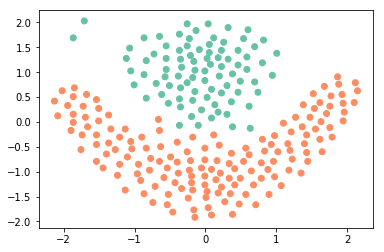

In [11]:
plt.scatter(X[:,0],X[:,1],c=np.array(colors)[y])
plt.show()

3


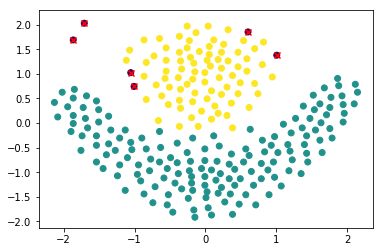

0.933571245117556


In [16]:
model = DBSCAN(eps = 0.42, min_samples=11)
labels = model.fit_predict(X)

print( len(np.unique(labels) ))

plt.scatter(X[:,0],X[:,1],c=labels+1)
plt.scatter(X[labels==-1,0],X[labels==-1,1], c = 'r', marker = 'x')
plt.show()

print(metrics.adjusted_rand_score(y, labels))

# Zad.

Zgadnij, która miara zadziała najlepiej

In [17]:
X = np.loadtxt("./data_cl/pathbased_data.txt")
y = np.loadtxt("./data_cl/pathbased_label.txt").astype(int)
print(X.shape)
print(np.unique(y))

(300, 2)
[0 1 2]


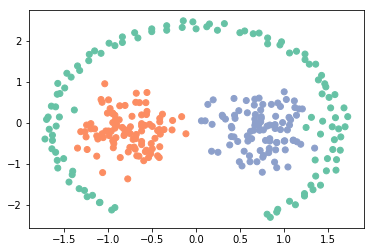

In [18]:
plt.scatter(X[:,0],X[:,1],c=np.array(colors)[y])
plt.show()

3


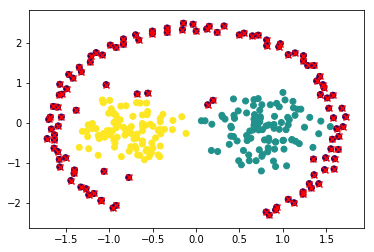

0.8812363734308486


In [20]:
model = DBSCAN(eps = 0.3, min_samples=10)
labels = model.fit_predict(X)

print( len(np.unique(labels) ))

plt.scatter(X[:,0],X[:,1],c=labels+1)
plt.scatter(X[labels==-1,0],X[labels==-1,1], c = 'r', marker = 'x')
plt.show()

print(metrics.adjusted_rand_score(y, labels))

# Zad.

Zgadnij, która miara zadziała najlepiej

In [11]:
X = np.loadtxt("./data_cl/jain_data.txt")
y = np.loadtxt("./data_cl/jain_label.txt").astype(int)
print(X.shape)
print(np.unique(y))

(373, 2)
[0 1]


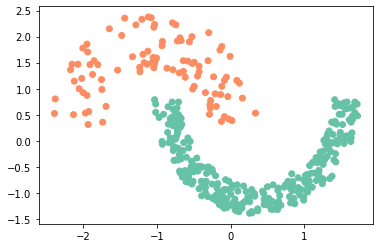

In [12]:
plt.scatter(X[:,0],X[:,1],c=np.array(colors)[y])
plt.show()

2


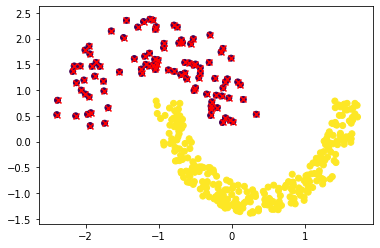

1.0


In [13]:
model = DBSCAN(eps = 0.23, min_samples=14)
labels = model.fit_predict(X)

print( len(np.unique(labels) ))

plt.scatter(X[:,0],X[:,1],c=labels+1)
plt.scatter(X[labels==-1,0],X[labels==-1,1], c = 'r', marker = 'x')
plt.show()

print(metrics.adjusted_rand_score(y, labels))

# Zad.

Zgadnij, która miara zadziała najlepiej

In [28]:
X = np.loadtxt("./data_cl/Compound_data.txt")
y = np.loadtxt("./data_cl/Compound_label.txt").astype(int)
print(X.shape)
print(np.unique(y))

(399, 2)
[0 1 2 3 4 5]


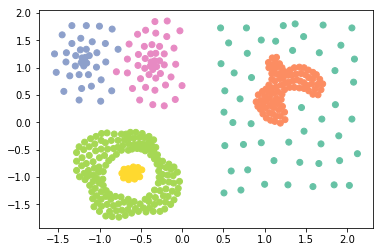

In [29]:
plt.scatter(X[:,0],X[:,1],c=np.array(colors)[y])
plt.show()

6


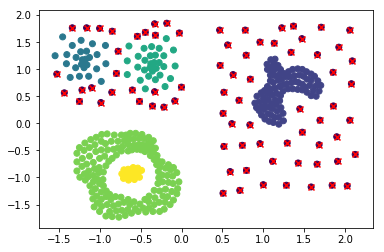

0.925992605744406


In [35]:
model = DBSCAN(eps = 0.2, min_samples=5)
labels = model.fit_predict(X)

print( len(np.unique(labels) ))

plt.scatter(X[:,0],X[:,1],c=labels+1)
plt.scatter(X[labels==-1,0],X[labels==-1,1], c = 'r', marker = 'x')
plt.show()

print(metrics.adjusted_rand_score(y, labels))

# Zad.

Zgadnij, która miara zadziała najlepiej

In [36]:
X = np.loadtxt("./data_cl/spiral_data.txt")
y = np.loadtxt("./data_cl/spiral_label.txt").astype(int)
print(X.shape)
print(np.unique(y))

(312, 2)
[0 1 2]


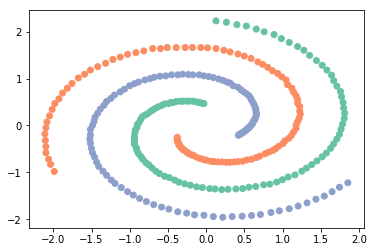

In [37]:
plt.scatter(X[:,0],X[:,1],c=np.array(colors)[y])
plt.show()

3


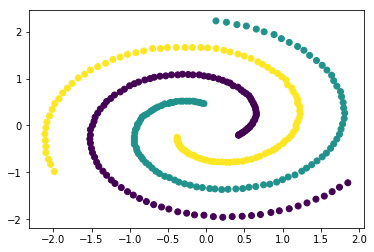

1.0


In [39]:
model = DBSCAN(eps = 0.3, min_samples=2)
labels = model.fit_predict(X)

print( len(np.unique(labels) ))

plt.scatter(X[:,0],X[:,1],c=labels+1)
plt.scatter(X[labels==-1,0],X[labels==-1,1], c = 'r', marker = 'x')
plt.show()

print(metrics.adjusted_rand_score(y, labels))